Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4963 - loss: 0.7637 - val_accuracy: 0.5267 - val_loss: 0.6860
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4935 - loss: 0.7237 - val_accuracy: 0.5333 - val_loss: 0.6760
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4652 - loss: 0.7073 - val_accuracy: 0.5667 - val_loss: 0.6707
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5020 - loss: 0.6990 - val_accuracy: 0.5933 - val_loss: 0.6678
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5125 - loss: 0.6911 - val_accuracy: 0.5800 - val_loss: 0.6667
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5383 - loss: 0.6886 - val_accuracy: 0.5867 - val_loss: 0.6653
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5784 - loss: 0.6813 - val_accuracy: 0.5867 - val_loss: 0.6651
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5389 - loss: 0.6933 - val_accuracy: 0.6133 - val_loss: 0.6650
Epo

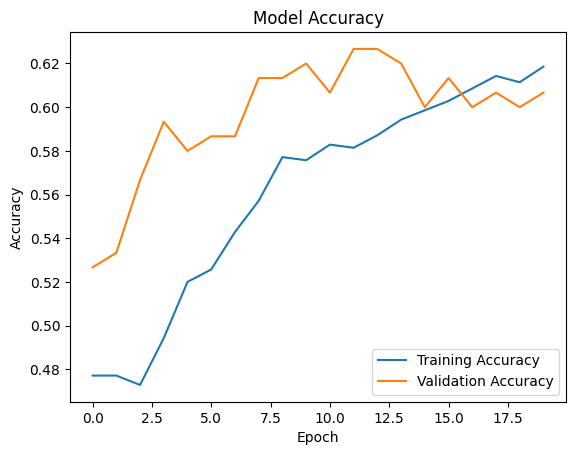

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step



Sample Predictions:
True Label: 1, Predicted: 1
True Label: 1, Predicted: 1
True Label: 0, Predicted: 0
True Label: 1, Predicted: 0
True Label: 1, Predicted: 1
Model saved as 'fnn_model.h5'


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(42)
n_samples = 1000
n_features = 10

X = np.random.rand(n_samples, n_features)
y = np.random.randint(0, 2, n_samples)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(16, activation='relu', input_shape=(n_features,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    batch_size=16,
                    verbose=1)


test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)
print("\nSample Predictions:")
for i in range(5):
    print(f"True Label: {y_test[i]}, Predicted: {predicted_classes[i][0]}")

model.save('fnn_model.h5')
print("Model saved as 'fnn_model.h5'")